# What is Time Series Analysis

__*Time series analysis uses statistical techniques to determine how a sequence of numerical data points varies during a specific period of time. For example, time series analysis is used in the financial sector to track the prices of securities, commodities, and other assets to discover how they may vary seasonally.*__

![](https://www.business-science.io/assets/2018-12-04-time-series/ensemble.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("../input/airline-passenger-traffic/airline-passenger-traffic(1).csv", header=None)

In [3]:
data.head()

,0,1
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
data.columns = ['Month', 'Passengers']
data.Month = pd.to_datetime(data.Month, format='%Y-%m')
data.Passengers = data.Passengers.astype("float64")
data = data.set_index('Month')

In [5]:
data.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


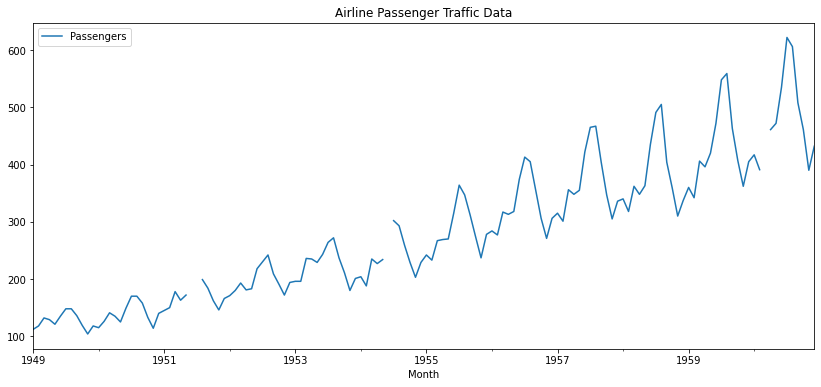

In [6]:
data.plot(figsize=(14,6))
plt.title('Airline Passenger Traffic Data')
plt.show(block=False)

# Treat Missing Value

<h3>Mean_Imputation</h3>

In [7]:
data['Passengers_Mean_Imputation'] = data.Passengers.fillna(data.Passengers.mean())

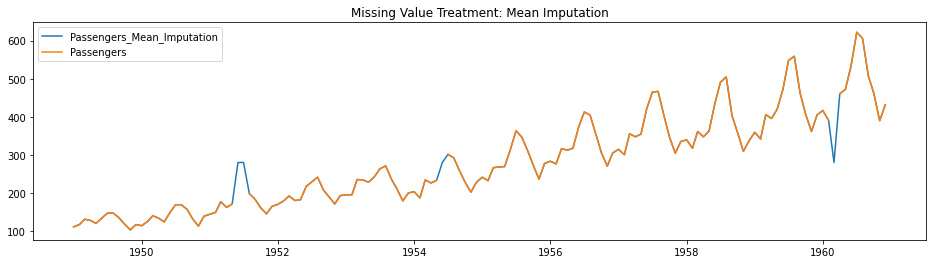

In [8]:
plt.figure(figsize=(16,4))
plt.plot(data.Passengers_Mean_Imputation, label='Passengers_Mean_Imputation')
plt.plot(data.Passengers, label='Passengers')
plt.legend(loc='best')
plt.title('Missing Value Treatment: Mean Imputation')
plt.show(block=False)

<h3>Linear_Interpolation</h3>

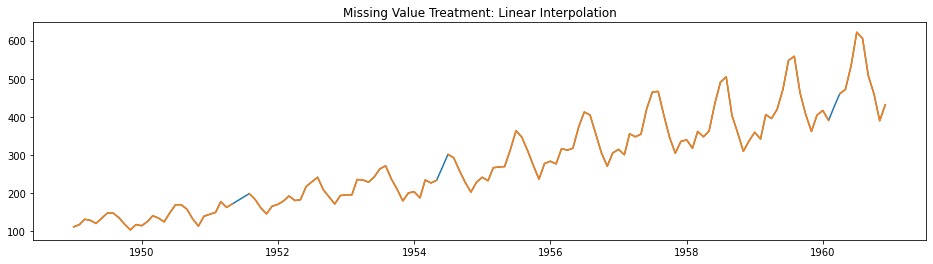

In [9]:
data['Passengers_Linear_Interpolation'] = data.Passengers.interpolate(method='linear')

plt.figure(figsize=(16,4))
plt.plot(data.Passengers_Linear_Interpolation, label='Passengers_Linear_Interpolation')
plt.plot(data.Passengers, label='Passengers')
plt.title('Missing Value Treatment: Linear Interpolation')
plt.show(block=False)

In [10]:
data.head()

,Passengers,Passengers_Mean_Imputation,Passengers_Linear_Interpolation
Month,,,
1949-01-01,112.0,112.0,112.0
1949-02-01,118.0,118.0,118.0
1949-03-01,132.0,132.0,132.0
1949-04-01,129.0,129.0,129.0
1949-05-01,121.0,121.0,121.0


In [11]:
data["Passengers"]=data["Passengers_Linear_Interpolation"]
data.drop(columns=['Passengers_Mean_Imputation','Passengers_Linear_Interpolation'],inplace=True)

In [12]:
data.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


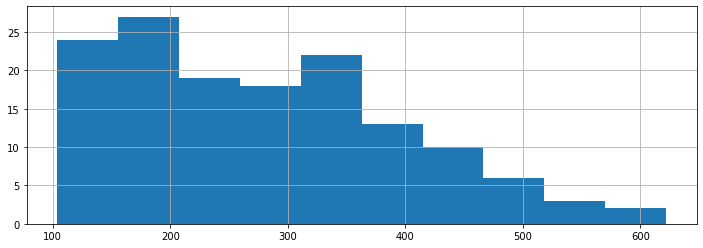

In [13]:
fig = data.Passengers.hist(figsize=(12,4))

# Decomposition

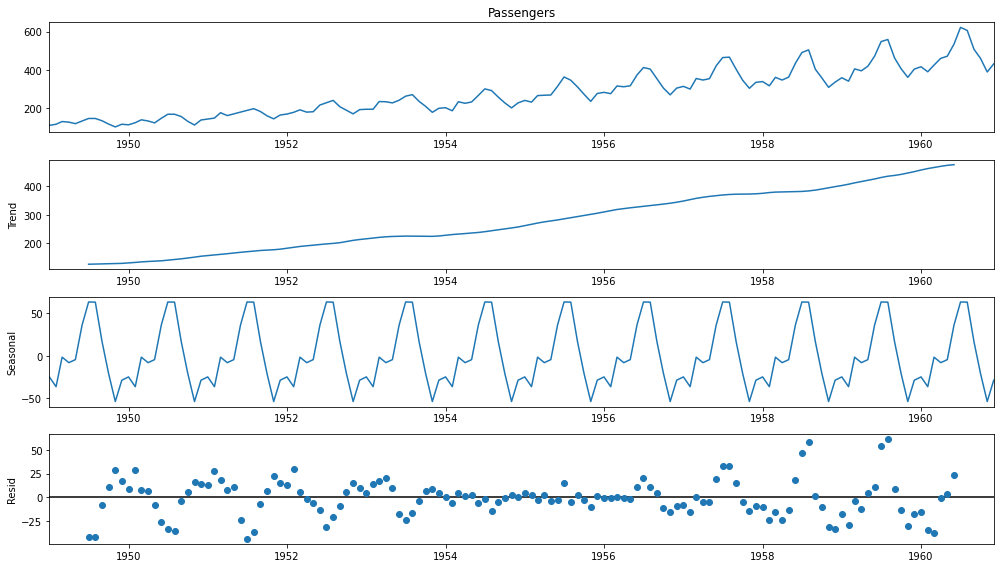

In [14]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = (14,8)
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive')
fig = decomposition.plot()
plt.show()

# Seasonal Decomposition

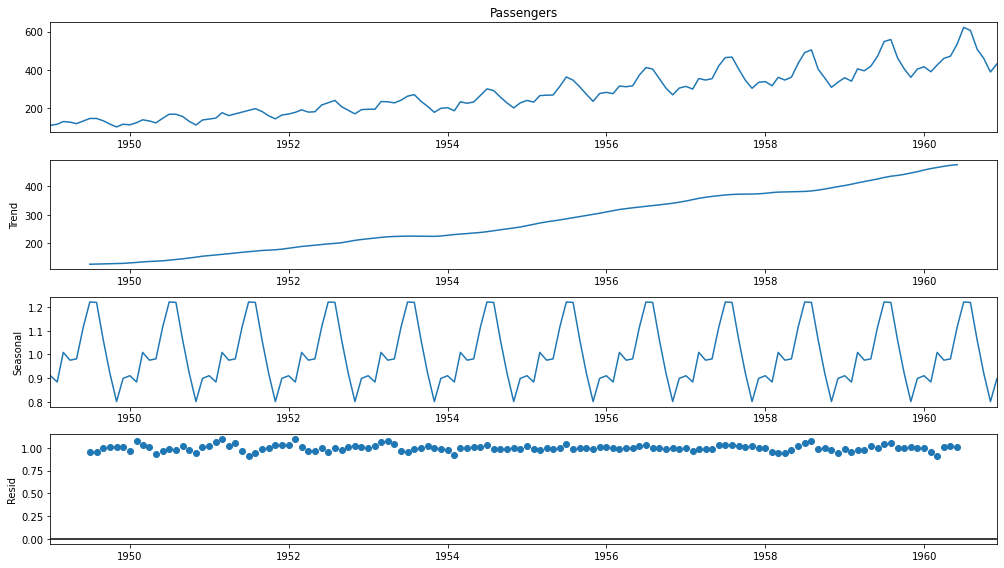

In [15]:
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='multiplicative')
fig = decomposition.plot()
plt.show()

# Naive Method

In [16]:
data.shape

(144, 1)

In [17]:
def create_method(title, func):
    yhat = data[124 :].copy()
    yhat[title] = func
    return yhat
    
ynaive = create_method('naive_forecast', data[: 124].Passengers[124 - 1])

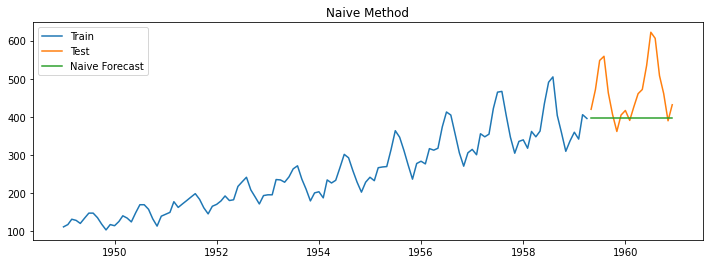

In [18]:
def plot_method(yhat, title):
    plt.figure(figsize=(12,4))
    plt.plot(data[: 124].Passengers, label = 'Train')
    plt.plot(data[124 :].Passengers, label = 'Test')
    plt.plot(yhat, label = title + ' Forecast')
    plt.legend(loc='best')
    plt.title(title + ' Method')
    plt.show()
    
plot_method(ynaive.naive_forecast, 'Naive')

In [19]:
from sklearn.metrics import mean_squared_error

def error(yhat, title, prevResults, length):
    rmse = np.sqrt(mean_squared_error(data[124 :].Passengers, yhat[length:])).round(2)
    mape = np.round(np.mean(np.abs(data[124 :].Passengers-yhat[length:])/data[124 :].Passengers)*100, 2)

    result = pd.DataFrame({'Method':[title + ' Method'], 'RMSE':[rmse], 'MAPE':[mape]})
    result = pd.concat([prevResults, result])
    return result

result= error(ynaive.naive_forecast, 'Naive', None, 0)
result

,Method,RMSE,MAPE
0,Naive Method,101.45,14.7
